In [1]:
import pandas as pd 
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("braves_23_sim.csv")
df

,game_date,game_pk,player_name,batter,pitcher,stand,p_throws,pit_handR,bat_handR,home_team,...,responsible_fielder_x,responsible_fielder_y,responsible_fielder_angle,responsible_fielder_depth,responsible_fielder_coords_diff,responsible_fielder_angle_diff,fielder_landing_x,fielder_landing_y,fielder_landing_angle_radians,is_out
0,2023-10-12,748561,"Johnson, Pierce",592206,572955,R,R,1,1,PHI,...,-76.896164,116.285126,-33.475571,139.410368,16.465525,5.777129,-5.416530,-15.549107,-1.906000,1
1,2023-10-09,748563,"Yates, Kirby",592206,489446,R,R,1,1,ATL,...,136.387080,260.838400,27.604150,294.343518,27.580649,2.875241,-23.155956,-14.983121,-2.567292,0
2,2023-10-07,748562,"Strider, Spencer",592206,675911,R,R,1,1,ATL,...,-76.896164,116.285126,-33.475571,139.410368,104.970393,1.711256,57.038557,-88.121429,-0.996341,1
3,2023-10-07,748562,"Strider, Spencer",592206,675911,R,R,1,1,ATL,...,-76.896164,116.285126,-33.475571,139.410368,137.511766,17.756683,75.340691,-115.035934,-0.990962,1
4,2023-10-07,748562,"Strider, Spencer",592206,675911,R,R,1,1,ATL,...,136.387080,260.838400,27.604150,294.343518,61.869917,5.351455,-4.410295,61.712527,1.642140,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,2023-04-04,718711,"Dodd, Dylan",660766,689266,R,L,0,1,STL,...,-149.088490,256.868700,-30.131196,296.999843,76.551805,7.285287,10.581436,-75.816964,-1.432127,0
1769,2023-04-04,718711,"Dodd, Dylan",666185,689266,R,L,0,1,STL,...,68.324400,103.364760,33.464817,123.905195,41.286925,1.691603,18.544987,36.887581,1.104956,1
1770,2023-04-02,718743,"Tonkin, Michael",645302,543859,R,R,1,1,WSH,...,-36.778090,148.092070,-13.947022,152.590593,55.231617,7.668634,-0.017320,-55.231615,-1.571110,1
1771,2023-04-01,718753,"Jiménez, Joe",645302,641729,R,R,1,1,WSH,...,-75.237290,118.503030,-32.411366,140.369576,25.671836,1.810296,-17.887329,18.414305,2.341679,1


In [ ]:
# Select relevant features
features = [ 'responsible_fielder',
    'launch_speed', 'launch_angle', 
    'hit_direction', 'distance', 'landing_x', 'landing_y', 'responsible_fielder_x', 'responsible_fielder_y','responsible_fielder_depth'
]
target = ['is_out']

X = df.drop(columns=['is_out'])
y = df['is_out']

categorical_features = ['responsible_fielder']
numerical_features = ['hit_direction','launch_speed', 'launch_angle', 'distance', 
                      'landing_x', 'landing_y', 'responsible_fielder_x', 'responsible_fielder_y', 'responsible_fielder_depth']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Encode categorical variables
data_encoded = pd.get_dummies(df[features])

# Combine the encoded features with the target variables
data_model = pd.concat([data_encoded, df[target]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(128, input_shape=input_shape, kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(64, kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(32, kernel_regularizer=l2(0.01)))
    model.add(LeakyReLU(alpha=0.1))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create the model
input_shape = (X_train.shape[1],)
model = create_model(input_shape)

# Compile the model
model.compile(optimizer='AdamW', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.3, batch_size=32, callbacks=[early_stopping, reduce_lr])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

# Predict probabilities on the training set
y_pred_prob_train = model.predict(X_train)

# Train a logistic regression model on these probabilities
calibration_model = LogisticRegression()
calibration_model.fit(y_pred_prob_train.reshape(-1, 1), y_train)

# Predict probabilities on the test set using the original model
y_pred_prob_test = model.predict(X_test)

# Calibrate the predicted probabilities using the logistic regression model
y_pred_prob_calibrated = calibration_model.predict_proba(y_pred_prob_test.reshape(-1, 1))[:, 1]

# Compute and plot the calibration curve for the calibrated model
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_pred_prob_calibrated, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Calibrated Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot for Calibrated Model')
plt.legend()
plt.show()


In [ ]:

from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(y_test, y_pred_prob_calibrated)
print(f"Brier Score: {brier_score}")


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve

# Predict probabilities on the training set
y_pred_prob_train = model.predict(X_train).flatten()  # Use predict to get probabilities

# Train a logistic regression model on these probabilities
calibration_model = LogisticRegression()
calibration_model.fit(y_pred_prob_train.reshape(-1, 1), y_train)

# Predict probabilities on the test set using the original model
y_pred_prob_test = model.predict(X_test).flatten()  # Use predict to get probabilities

# Calibrate the predicted probabilities using the logistic regression model
y_pred_prob_calibrated = calibration_model.predict_proba(y_pred_prob_test.reshape(-1, 1))[:, 1]

# Compute and plot the calibration curve for the calibrated model
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y_test, y_pred_prob_calibrated, n_bins=10, strategy='uniform')

plt.figure(figsize=(8, 6))
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', label='Calibrated Model')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Plot for Calibrated Model')
plt.legend()
plt.show()



In [ ]:
#Making feature engineering changes to hopefully improve the model. 

In [5]:
df['relative_distance'] = np.sqrt((df['responsible_fielder_x'] - df['fielder_landing_x'])**2 + (df['responsible_fielder_y'] - df['fielder_landing_y'])**2)

# Display the DataFrame with the new column
df.head()
df['relative_distance'] = np.sqrt((df['responsible_fielder_x'] - df['fielder_landing_x'])**2 + (df['responsible_fielder_y'] - df['fielder_landing_y'])**2)

# Display the DataFrame with the new column
df.head()

def calculate_relative_angle(fielder_x, fielder_y, landing_x, landing_y):
    return np.degrees(np.arctan2(landing_y - fielder_y, landing_x - fielder_x))

df['relative_angle'] = df.apply(
    lambda row: calculate_relative_angle(row['responsible_fielder_x'], row['responsible_fielder_y'],
                                         row['fielder_landing_x'], row['fielder_landing_y']),
    axis=1
)

df

,game_date,game_pk,player_name,batter,pitcher,stand,p_throws,pit_handR,bat_handR,home_team,...,responsible_fielder_angle,responsible_fielder_depth,responsible_fielder_coords_diff,responsible_fielder_angle_diff,fielder_landing_x,fielder_landing_y,fielder_landing_angle_radians,is_out,relative_distance,relative_angle
0,2023-10-12,748561,"Johnson, Pierce",592206,572955,R,R,1,1,PHI,...,-33.475571,139.410368,16.465525,5.777129,-5.416530,-15.549107,-1.906000,1,149.965339,-61.533749
1,2023-10-09,748563,"Yates, Kirby",592206,489446,R,R,1,1,ATL,...,27.604150,294.343518,27.580649,2.875241,-23.155956,-14.983121,-2.567292,0,318.640067,-120.046313
2,2023-10-07,748562,"Strider, Spencer",592206,675911,R,R,1,1,ATL,...,-33.475571,139.410368,104.970393,1.711256,57.038557,-88.121429,-0.996341,1,244.377882,-56.765703
3,2023-10-07,748562,"Strider, Spencer",592206,675911,R,R,1,1,ATL,...,-33.475571,139.410368,137.511766,17.756683,75.340691,-115.035934,-0.990962,1,276.921456,-56.650314
4,2023-10-07,748562,"Strider, Spencer",592206,675911,R,R,1,1,ATL,...,27.604150,294.343518,61.869917,5.351455,-4.410295,61.712527,1.642140,1,243.874997,-125.263262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1768,2023-04-04,718711,"Dodd, Dylan",660766,689266,R,L,0,1,STL,...,-30.131196,296.999843,76.551805,7.285287,10.581436,-75.816964,-1.432127,0,369.017935,-64.361681
1769,2023-04-04,718711,"Dodd, Dylan",666185,689266,R,L,0,1,STL,...,33.464817,123.905195,41.286925,1.691603,18.544987,36.887581,1.104956,1,83.049415,-126.826588
1770,2023-04-02,718743,"Tonkin, Michael",645302,543859,R,R,1,1,WSH,...,-13.947022,152.590593,55.231617,7.668634,-0.017320,-55.231615,-1.571110,1,206.620122,-79.751676
1771,2023-04-01,718753,"Jiménez, Joe",645302,641729,R,R,1,1,WSH,...,-32.411366,140.369576,25.671836,1.810296,-17.887329,18.414305,2.341679,1,115.354978,-60.187670


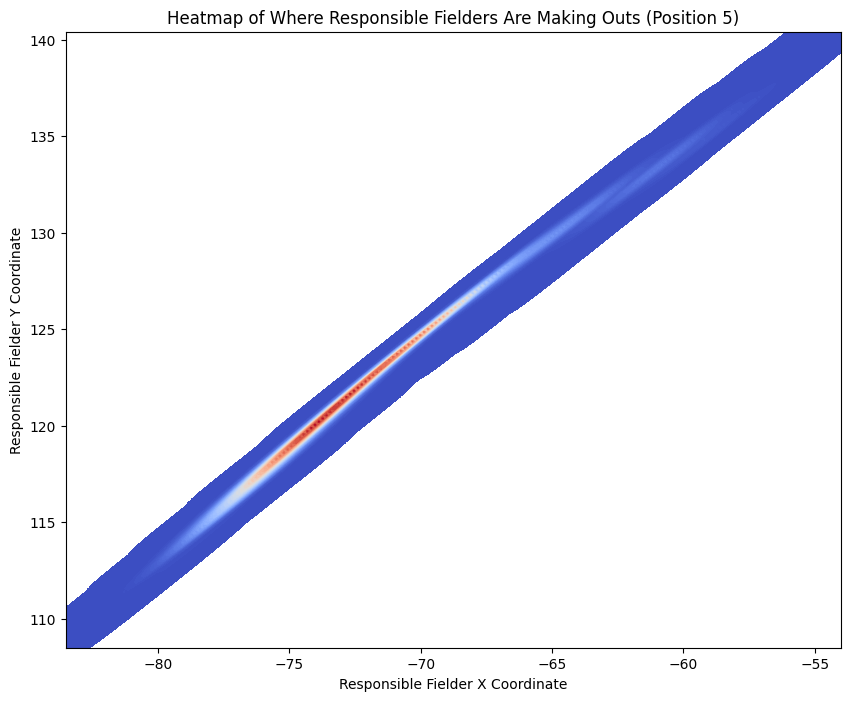

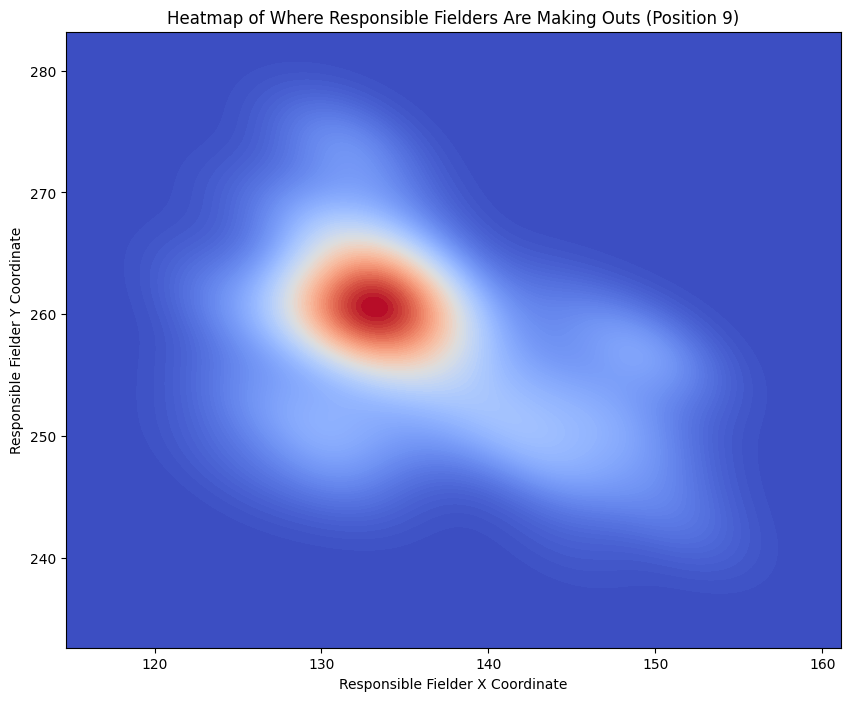

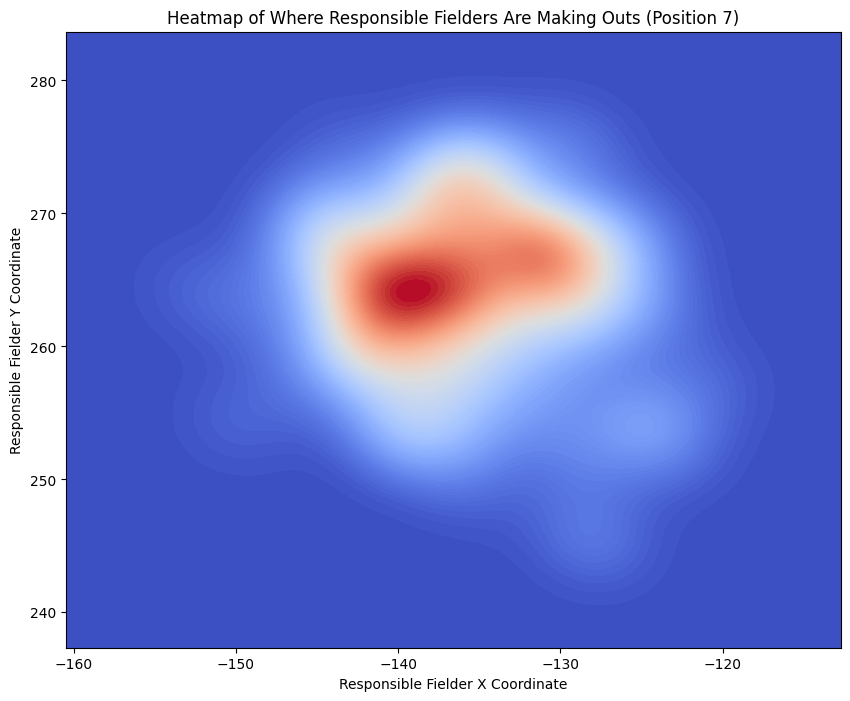

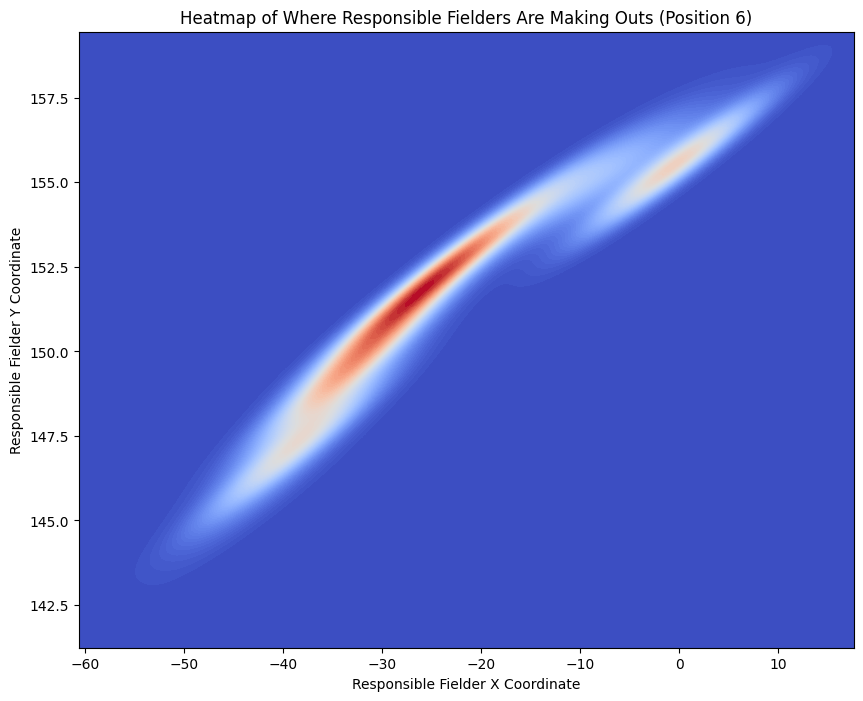

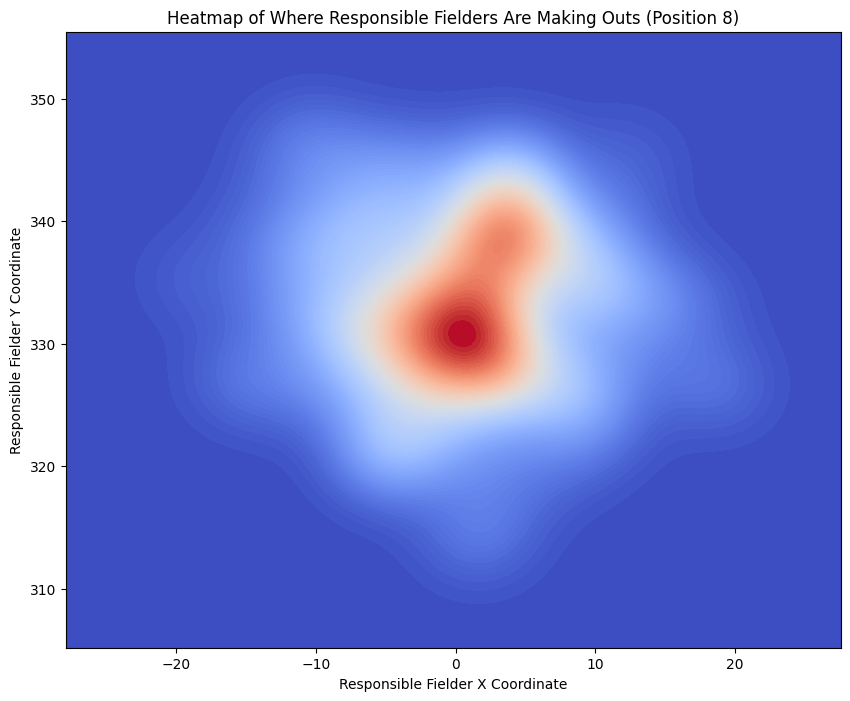

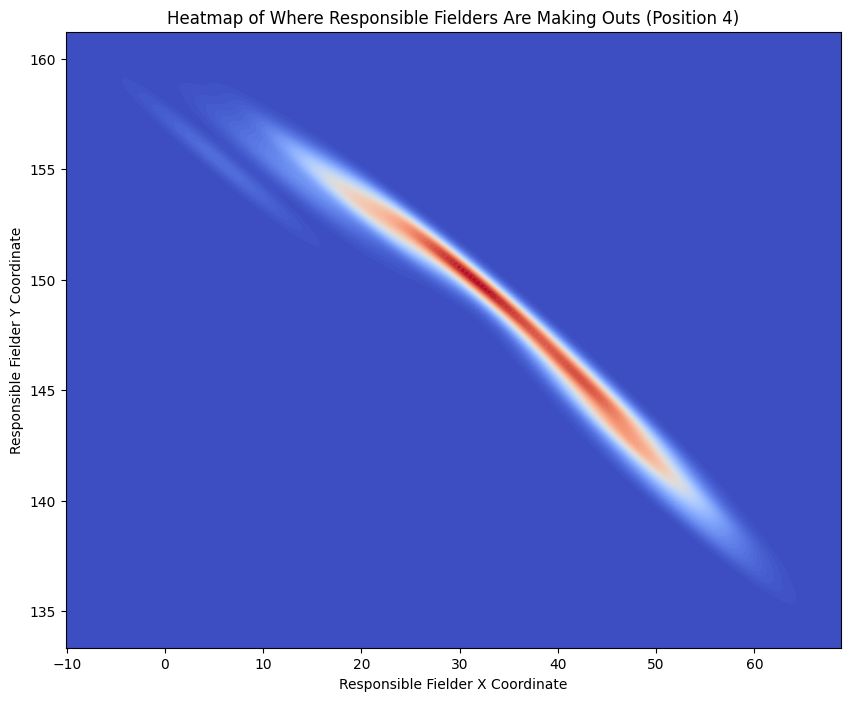

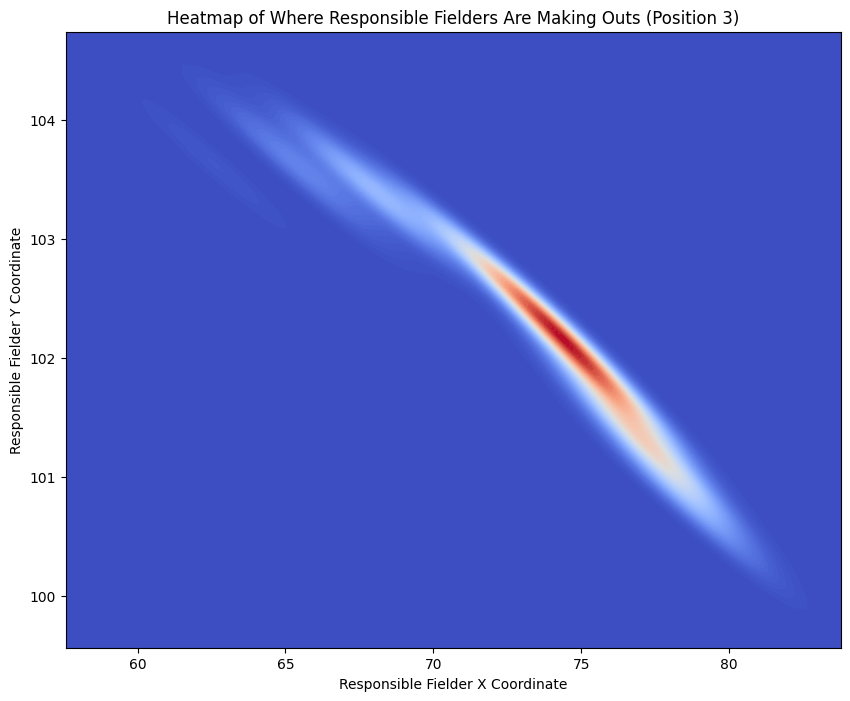

In [4]:
#Heat Maps 
import seaborn as sns
outs_data = df[df['is_out'] == 1]

# List of positions to create heatmaps for
positions = outs_data['responsible_fielder'].unique()

# Create heatmaps for each position
for position in positions:
    position_data = outs_data[outs_data['responsible_fielder'] == position]
    
    plt.figure(figsize=(10, 8))
    heatmap = sns.kdeplot(
        x=position_data['responsible_fielder_x'],
        y=position_data['responsible_fielder_y'],
        cmap='coolwarm',
        fill=True,
        thresh=0,
        levels=100
    )
    plt.title(f'Heatmap of Where Responsible Fielders Are Making Outs (Position {position})')
    plt.xlabel('Responsible Fielder X Coordinate')
    plt.ylabel('Responsible Fielder Y Coordinate')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


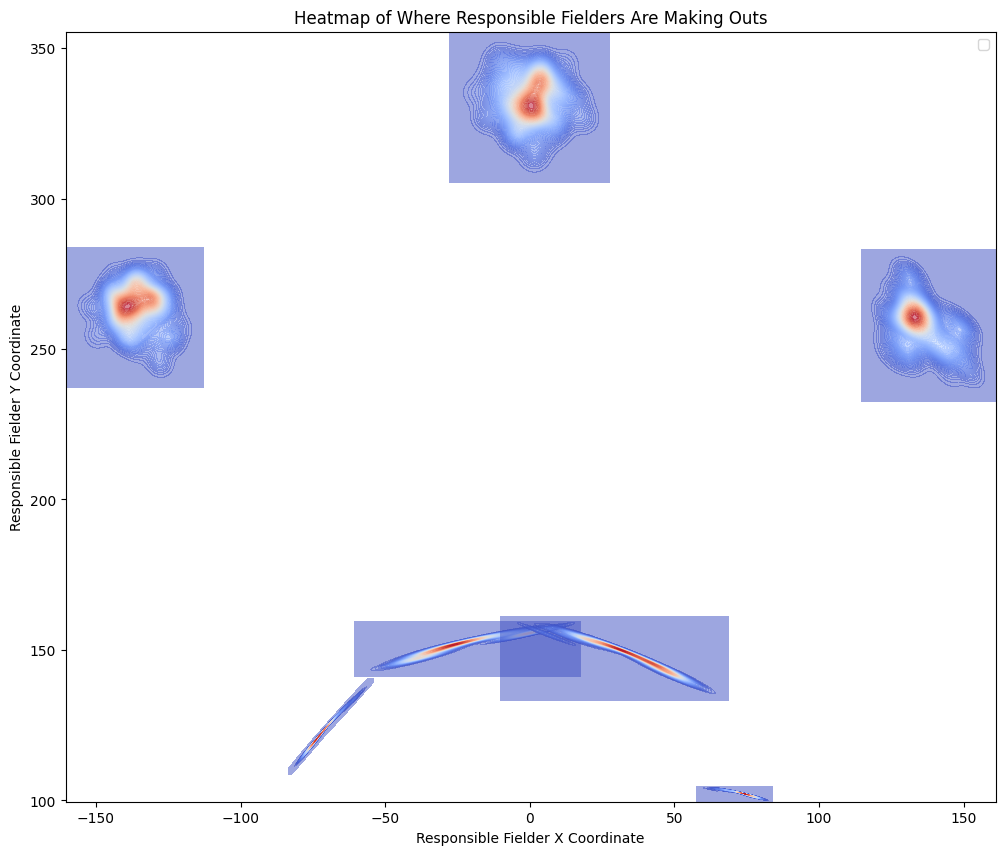

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

outs_data = df[df['is_out'] == 1]

# List of positions to create heatmaps for
positions = outs_data['responsible_fielder'].unique()

plt.figure(figsize=(12, 10))

# Set a uniform background color
plt.gca().patch.set_facecolor('white')  # Change 'white' to any color you prefer

# Create heatmaps for each position
for position in positions:
    position_data = outs_data[outs_data['responsible_fielder'] == position]
    
    sns.kdeplot(
        x=position_data['responsible_fielder_x'],
        y=position_data['responsible_fielder_y'],
        cmap='coolwarm',  # You can change this colormap to one that starts with a common color
        fill=True,
        thresh=0,
        levels=100,
        label=f'Position {position}',
        alpha=0.5  # Adjust alpha for transparency
    )

plt.title('Heatmap of Where Responsible Fielders Are Making Outs')
plt.xlabel('Responsible Fielder X Coordinate')
plt.ylabel('Responsible Fielder Y Coordinate')
plt.legend()
plt.show()



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
import tensorflow as tf

# Define the features and target
features = [
    'responsible_fielder', 'responsible_fielder_coords_diff', 'responsible_fielder_angle_diff', 
    'fielder_landing_x', 'fielder_landing_y', 'fielder_landing_angle_radians',
    'launch_speed', 'launch_angle', 'hit_direction', 'distance', 
    'landing_x', 'landing_y', 'responsible_fielder_x', 'responsible_fielder_y',
    'responsible_fielder_depth'
]
target = 'is_out'

# Assuming `filtered_data` is your DataFrame
X = df[features]
y = df[target]

# Encode the categorical feature `responsible_fielder`
label_encoder = LabelEncoder()
X['responsible_fielder'] = label_encoder.fit_transform(X['responsible_fielder'])

# Define numeric features
numeric_features = [
    'responsible_fielder_coords_diff', 'responsible_fielder_angle_diff', 
    'fielder_landing_x', 'fielder_landing_y', 'fielder_landing_angle_radians',
    'launch_speed', 'launch_angle', 'hit_direction', 'distance', 
    'landing_x', 'landing_y', 'responsible_fielder_x', 'responsible_fielder_y',
    'responsible_fielder_depth'
]

# Create a preprocessing pipeline for numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to numeric features
X_train_num = preprocessor.fit_transform(X_train[numeric_features])
X_test_num = preprocessor.transform(X_test[numeric_features])

# Define the input layers
numeric_input = Input(shape=(X_train_num.shape[1],), name='numeric_input')
categorical_input = Input(shape=(1,), name='categorical_input')

# Define the embedding layer for the categorical input
embedding_size = 10  # You can adjust this size based on your needs
embedding_layer = Embedding(input_dim=len(label_encoder.classes_), output_dim=embedding_size, input_length=1)(categorical_input)
embedding_flatten = Flatten()(embedding_layer)

# Concatenate the numeric and embedded categorical inputs
concatenated = Concatenate()([numeric_input, embedding_flatten])

# Add dense layers
x = Dense(128, kernel_regularizer=l2(0.01))(concatenated)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(64, kernel_regularizer=l2(0.01))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(32, kernel_regularizer=l2(0.01))(x)
x = LeakyReLU(alpha=0.1)(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

output = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=[numeric_input, categorical_input], outputs=output)

# Compile the model
model.compile(optimizer='AdamW', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Define callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Train the model
history = model.fit(
    [X_train_num, X_train['responsible_fielder']], y_train, 
    epochs=100, validation_split=0.3, batch_size=32, 
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate([X_test_num, X_test['responsible_fielder']], y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [ ]:
#add predictions with new data